281 matches


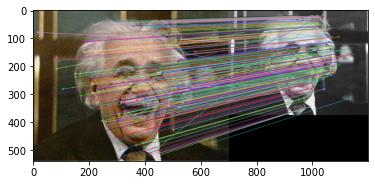

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  



#读入图片
imgA = cv2.imread('Ei1.jpg')
imgB = cv2.imread('Ei6.webp')


#构造sift，求解出特征点和sift特征向量
sift = cv2.SIFT_create()
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
kpsA, dpA = sift.detectAndCompute(grayA,None)
kpsB, dpB = sift.detectAndCompute(grayB,None)

#构造BFMatcher()蛮力匹配，匹配sift特征向量距离最近对应组分
bf = cv2.BFMatcher()
#获得匹配结果
matches = bf.knnMatch(dpA,dpB,k=2)

#对匹配结果按距离进行排序操作  
#matches = sorted(matches,key = lambda x: x.distance)

good = [] 
for m,n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])
print('%d matches' % len(good))
#cv2.drawMatches进行画图
ret = cv2.drawMatchesKnn(imgA,kpsA,imgB,kpsB,good,None,flags=2)



plt.imshow(cv2.cvtColor(ret, cv2.COLOR_BGR2RGB))